<a href="https://colab.research.google.com/github/KatBCN/NoSupervisat_Agrupament/blob/main/Sprint_11_PCA_Clustering_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#d50283'>IT Academy - Data Science Itinerary</font>
## Sprint 11 Task 1 - Visualizations of Clustering on PCA data
### Assignment by: Kat Weissman

#### General objective:

- Become familiar with clustering algorithms.

#### Python Learning Objectives:
- K Means
- Hierarchical clustering

*Recommended learning resources:*
- https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68
- https://realpython.com/k-means-clustering-python/
- https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
- https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019
- https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/


In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

### Level 1
### Exercise 1 
Group the different flights using the K-means algorithm.

Reference: 
- https://365datascience.com/tutorials/python-tutorials/pca-k-means/

In [2]:
pd.set_option('display.max_columns', None)  #set display to show all columns

I will load the data which I saved from a different notebook where I performed the clustering on PCA data.

- Repsitory Link: https://github.com/KatBCN/NoSupervisat_Agrupament


In [3]:
# load data
data_link = 'https://github.com/KatBCN/NoSupervisat_Agrupament/blob/main/flights-pca-clustered.csv?raw=true'
df = pd.read_csv(data_link)

#### Data Exploration

In [4]:
# Show number of rows and columns in dataframe
df.shape

(96419, 6)

In [5]:
# Show column names and dtypes
df.dtypes

PC_1         float64
PC_2         float64
PC_3         float64
PC_4         float64
2clusters      int64
4clusters      int64
dtype: object

The column '2clusters' has the cluster assignment for each row where 2 clusters are used. The cluster labels are 0 and 1.

The column '4clusters' has the cluster assignment for each row where 4 clusters are used. The cluster labels are 0, 1, 2, 3.

In [6]:
# Display first 5 rows of dataframe
df.head(5)

,PC_1,PC_2,PC_3,PC_4,2clusters,4clusters
0,-1.238091,2.850842,-0.921972,-1.012227,1,2
1,-0.922183,-0.549181,0.899407,0.613874,1,0
2,-1.294626,-1.472463,-0.382035,0.496146,1,0
3,-1.149435,-0.316652,-0.687722,-0.612451,1,0
4,-0.947126,-0.554357,0.095276,-0.588490,1,0


From the notebook where the PCA was performed, we know:
1. Principal Component 1 represents Departure Delay and Arrival Delay the most, followed by TaxiOut and TaxiIn
2. Principal Component 2 represents AirTime, Distance, and CRSElapasedTime the most, followed by TaxiIn and TaxiOut
3. Principal Component 3 represents TaxiIn the most
4. Principal Component 4 represents TaxiOut the most

#### Visualizations on Principal Components for 2 Clusters

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


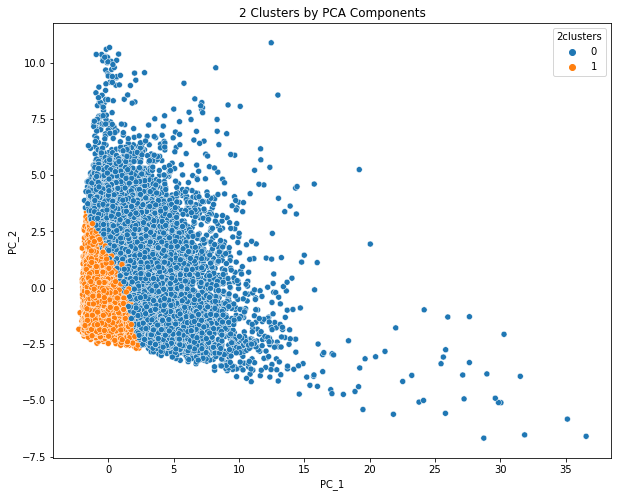

In [7]:
x_axis = df['PC_1']
y_axis = df['PC_2']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=df['2clusters'])
plt.title('2 Clusters by PCA Components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


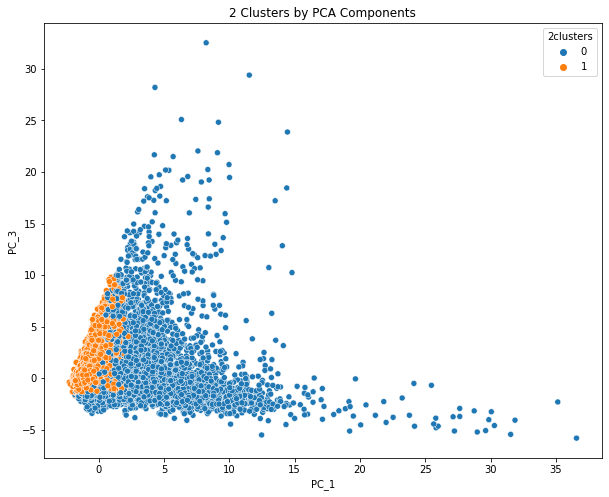

In [9]:
x_axis = df['PC_1']
y_axis = df['PC_3']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=df['2clusters'])
plt.title('2 Clusters by PCA Components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


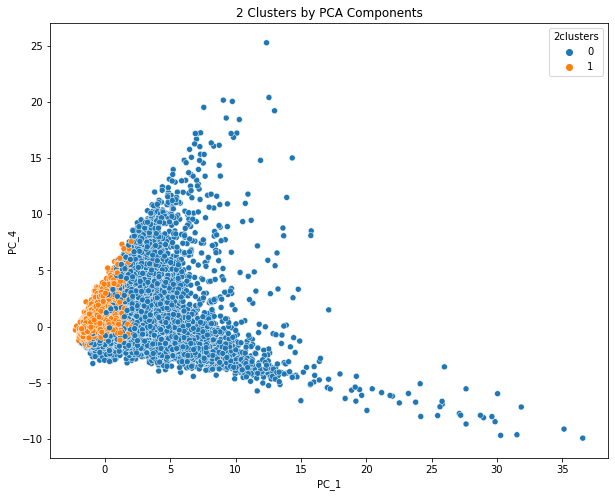

In [11]:
x_axis = df['PC_1']
y_axis = df['PC_4']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=df['2clusters'])
plt.title('2 Clusters by PCA Components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


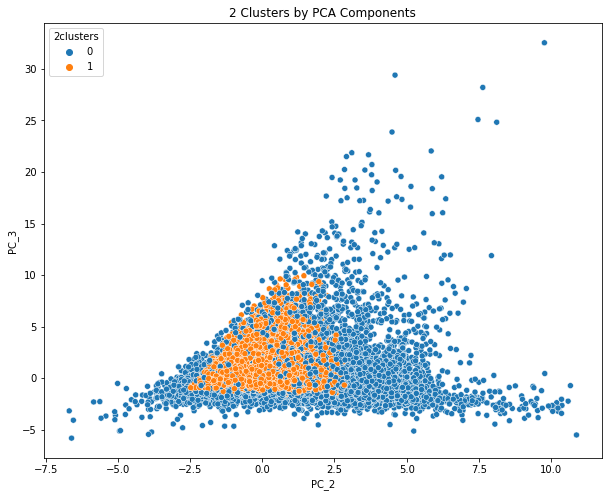

In [16]:
x_axis = df['PC_2']
y_axis = df['PC_3']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=df['2clusters'])
plt.title('2 Clusters by PCA Components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


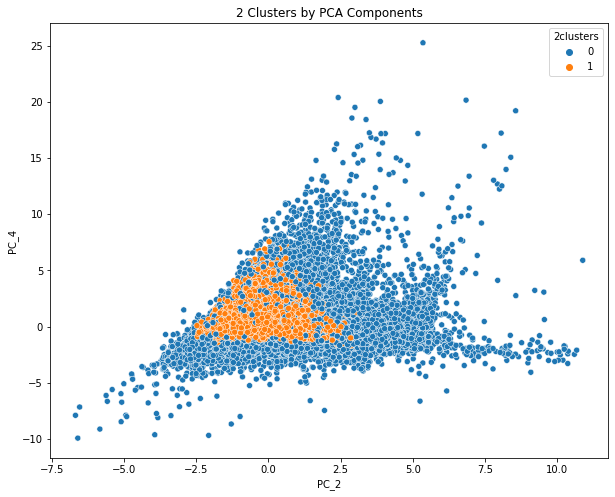

In [17]:
x_axis = df['PC_2']
y_axis = df['PC_4']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=df['2clusters'])
plt.title('2 Clusters by PCA Components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


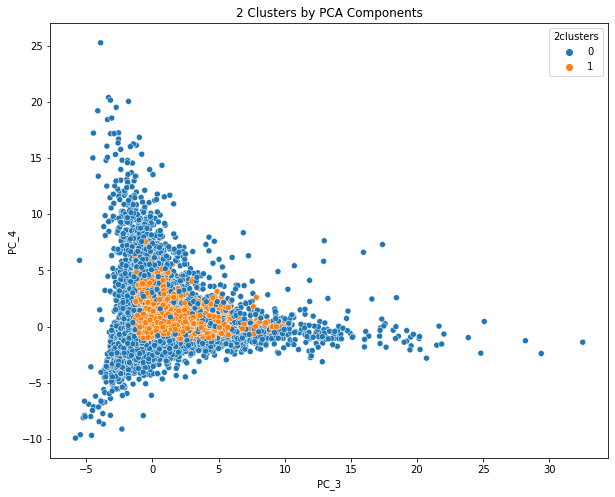

In [18]:
x_axis = df['PC_3']
y_axis = df['PC_4']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=df['2clusters'])
plt.title('2 Clusters by PCA Components')
plt.show()

#### Visualizations on Principal Components for 4 Clusters

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


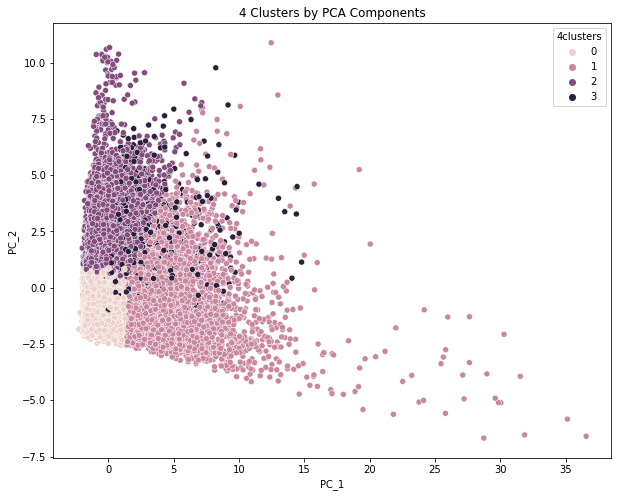

In [8]:
x_axis = df['PC_1']
y_axis = df['PC_2']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=df['4clusters'])
plt.title('4 Clusters by PCA Components')
plt.show()

The clusters are easier to identify when we compare Principal Component 1 to Principal Component 3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


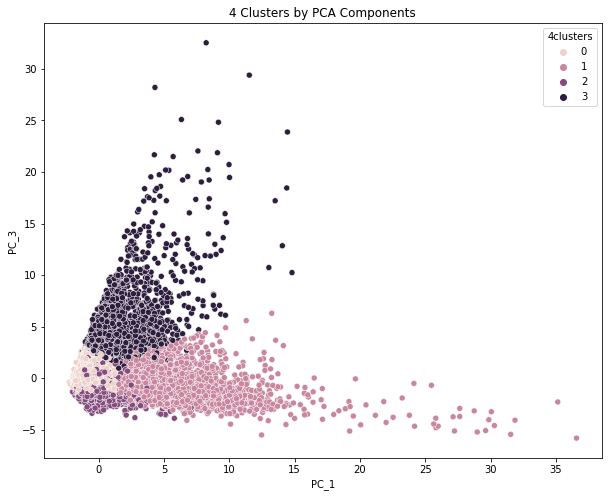

In [10]:
x_axis = df['PC_1']
y_axis = df['PC_3']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=df['4clusters'])
plt.title('4 Clusters by PCA Components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


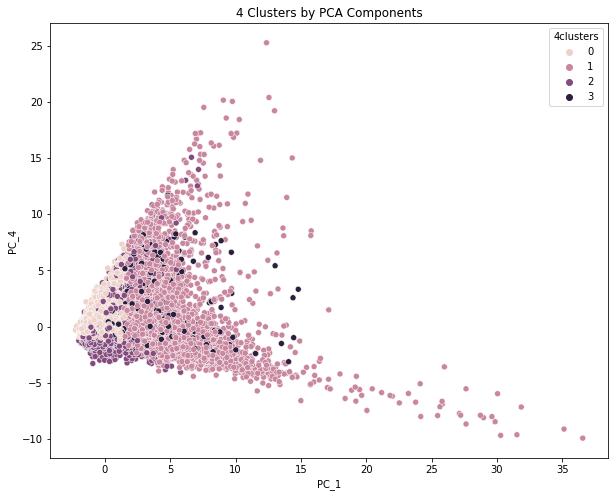

In [12]:
x_axis = df['PC_1']
y_axis = df['PC_4']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=df['4clusters'])
plt.title('4 Clusters by PCA Components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


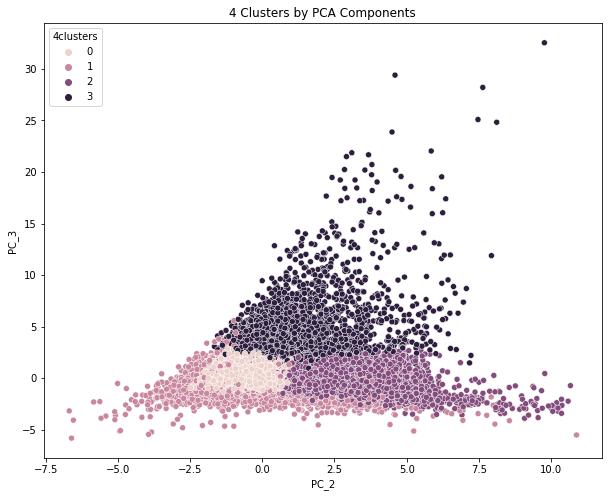

In [15]:
x_axis = df['PC_2']
y_axis = df['PC_3']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=df['4clusters'])
plt.title('4 Clusters by PCA Components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


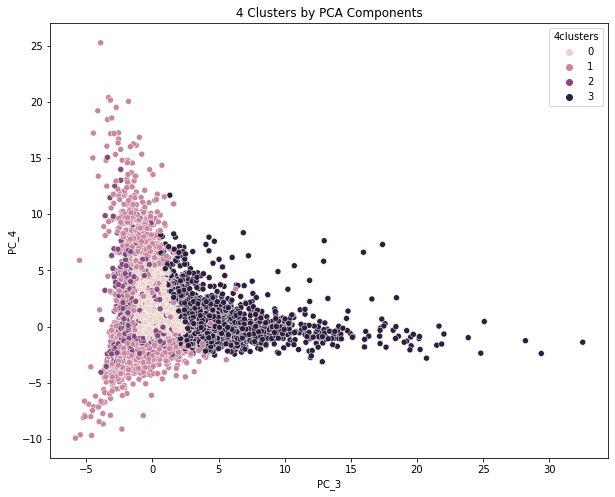

In [14]:
x_axis = df['PC_3']
y_axis = df['PC_4']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=df['4clusters'])
plt.title('4 Clusters by PCA Components')
plt.show()